In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2. Đọc file dữ liệu chứng khoán Eximbank và chia tập train test theo tỉ lệ 8:2
df = pd.read_csv('Eximbank.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Chia dữ liệu thành 2 tập train và test
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [3]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm mô hình ARIMA phù hợp nhất bằng auto_arima 
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit mô hình
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15667.169, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15679.216, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15665.878, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15667.413, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15677.282, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15664.996, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=15666.507, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15665.874, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15664.387, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15665.924, Time=0.50 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15665.476, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=15662.363, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=15665.461, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=15663.922, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [4]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [6]:
# 5. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Tạo một mảng gồm 90 số nguyên liên tiếp bắt đầu từ last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán giá đóng cho 90 ngày tiếp theo
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# In ra giá đóng đã được dự đoán trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[15870.13748695 15858.32189877 15851.23252646 15846.97889143
 15844.42670342 15842.89538643 15841.97659372 15841.42531658
 15841.09454939 15840.89608854 15840.7770117  15840.7055654
 15840.6626975  15840.63697669 15840.62154417 15840.61228463
 15840.60672889 15840.60339543 15840.60139535 15840.6001953
 15840.59947527 15840.59904325 15840.59878404 15840.59862851
 15840.59853519 15840.5984792  15840.59844561 15840.59842545
 15840.59841336 15840.5984061  15840.59840175 15840.59839914
 15840.59839757 15840.59839663 15840.59839606 15840.59839573
 15840.59839552 15840.5983954  15840.59839533 15840.59839528
 15840.59839526 15840.59839524 15840.59839523 15840.59839523
 15840.59839522 15840.59839522 15840.59839522 15840.59839522
 15840.59839522 15840.59839522 15840.59839522 15840.59839522
 15840.59839522 15840.59839522 15840.59839522 15840.59839522
 15840.59839522 15840.59839522 15840.59839522 15840.59839522
 15840.59839522 15840.59839522 15840.598

In [7]:
# 6. Tính độ đo RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 2768.025929635295


In [8]:
# 7. Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))*100
print('Testing MAPE:', test_mape)

Testing MAPE: 13.16921417443306


In [9]:
# 8. Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing MAE: 2480.930486795257


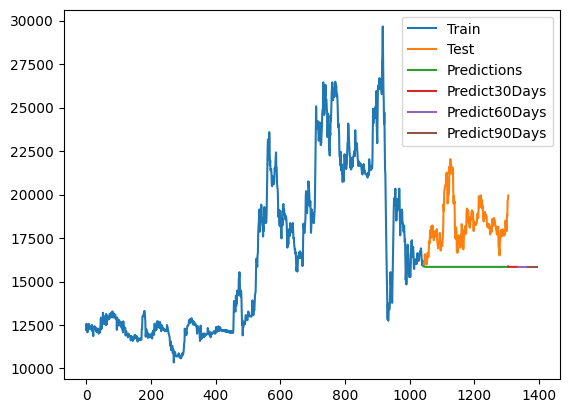

In [10]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data[0:30],y_next_90_days[0:30])
plt.plot(last_data[30:60],y_next_90_days[30:60])
plt.plot(last_data[60:90],y_next_90_days[60:90])
plt.legend(['Train', 'Test', 'Predictions','Predict30Days', 'Predict60Days', 'Predict90Days'])
plt.show()

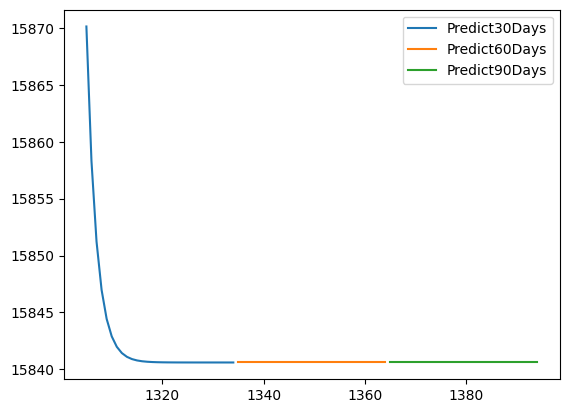

In [11]:
plt.plot(last_data[0:30],y_next_90_days[0:30])
plt.plot(last_data[30:60],y_next_90_days[30:60])
plt.plot(last_data[60:90],y_next_90_days[60:90])
plt.legend(['Predict30Days', 'Predict60Days', 'Predict90Days'])
plt.show()